### Feature Transformation

- Transforming the features distribution into normal distribution

- Most algorithm requires the feature into normal distibution while some does not requires that such as decision tree , random forest, here it does not matter whether the feature distribution is normal or not.
- Linear and logistic regression requires the data in normal distribution.


### How to check feature is normal or not.

- sns.distplot()
- Check the skewness - if pd.skew() = 0 , then normal else skewed.
- QQ plot - Reliable way to check whether feature is normal or not.

- Below we have draw the qq plot if line is straight then it is normal else skewed


### Types of Feature Transformation 

- Log Transform : If data is right skewed data then use it.
- Reciprocal Transform : 
- Power Transform - square , square root : If data is left skewed data then go with square power transform.

- Box-Cox Transform
- Yeo-Johnson Transform.


### Function Tranformer 

- Log Transform
- Reciprocal Transform
- Power Transform - square , square root
- Custom Transformer

### Power Transform

- Box-Cox Transform : 1. values > 0 , 2.values cannot be negative.
- Yeo-Johnson Transform : Overcome problem of box-cox transform.


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("D:\\Sandesh\\100-days-of-machine-learning\\day30-function-transformer\\train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df = df[['Age','Fare','Survived']]
df.isnull().sum()

Age         177
Fare          0
Survived      0
dtype: int64

In [5]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [6]:
df.isnull().sum()

Age         0
Fare        0
Survived    0
dtype: int64

In [7]:
df.isnull().sum()

Age         0
Fare        0
Survived    0
dtype: int64

In [8]:
X=df.iloc[:,0:2]
Y=df.iloc[:,2]

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)


In [10]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape 

((712, 2), (179, 2), (712,), (179,))

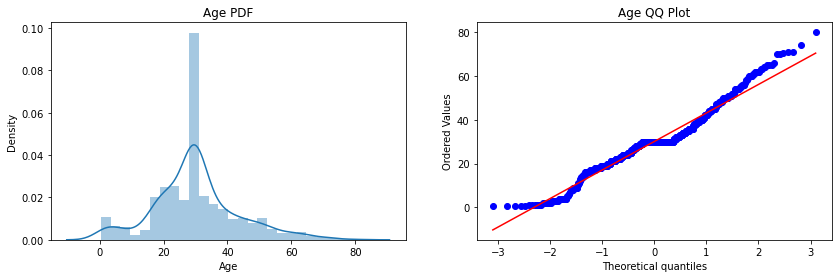

In [11]:

# In QQ plot , all the datapoints are almost on the straight line, it is near 
# to normal distribution

import scipy.stats as stats 
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'],dist="norm",plot=plt)
plt.title('Age QQ Plot')

plt.show()

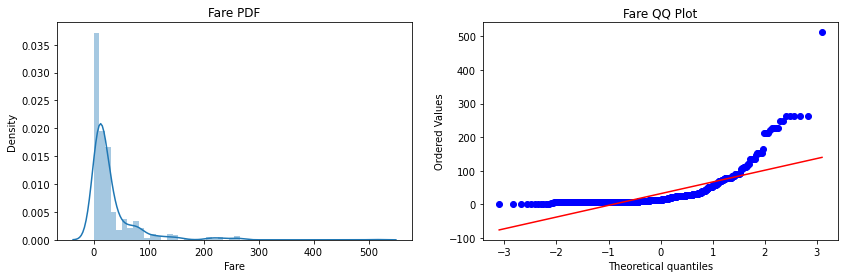

In [12]:

# Fare is not normally distributed , distibution is right skewed .

import scipy.stats as stats 
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'],dist="norm",plot=plt)
plt.title('Fare QQ Plot')

plt.show()

In [13]:
cf1=LogisticRegression()
cf2=DecisionTreeClassifier()

In [14]:
cf1.fit(X_train,y_train)
cf2.fit(X_train,y_train)

y_pred1=cf1.predict(X_test)
y_pred2=cf2.predict(X_test)


print("Accuracy LR",accuracy_score(y_test,y_pred1))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6033519553072626
Accuracy DT 0.6201117318435754


### 1. Function Transformer 

In [15]:

# Tranforming the values of all features available 
# Function transformed will apply log transform to the entire features 

# log1p is used bec if there are 0 values available in data else result = 0
# hence to add 1 so that 0 can be avoided.


trf=FunctionTransformer(func=np.log1p)
X_train_transformed=trf.fit_transform(X_train)
X_test_transformed=trf.transform(X_test)

clf1=LogisticRegression()
clf2=DecisionTreeClassifier()

clf1.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

y_pred1=clf1.predict(X_test)
y_pred2=clf2.predict(X_test)


print("Accuracy",accuracy_score(y_test,y_pred1))
print("Accuracy",accuracy_score(y_test,y_pred2))

# Decision tree algorithm does not care about the feature distribution hence 
# the accuray has decreased whereas the linear algo accuracy has increased.



Accuracy 0.6256983240223464
Accuracy 0.5865921787709497


### Use Cross_validation to check multiple results 

In [16]:
X_transformed=trf.fit_transform(X)

clf1=LogisticRegression()
clf2=DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf1,X_transformed,Y,cv=20,scoring="accuracy")))
print("DT",np.mean(cross_val_score(clf1,X_transformed,Y,cv=10,scoring="accuracy")))


LR 0.6771212121212122
DT 0.678027465667915


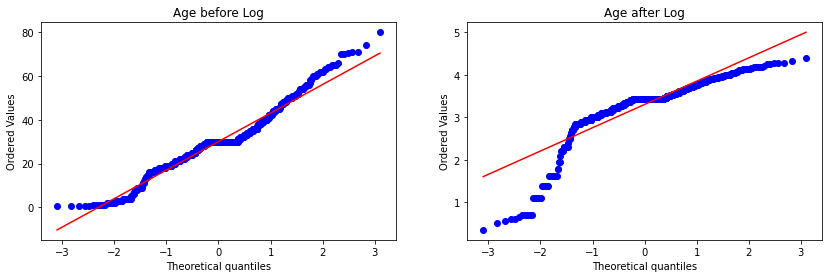

In [17]:

# Check the plots before and after applying logs
# As Age features was normally distributed after applying transformation 
# the distribution is not good as compare to previous one.
# So there was no need of transformation to age features .


plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'],dist="norm",plot=plt)
plt.title("Age before Log")

plt.subplot(122)
stats.probplot(X_train_transformed['Age'],dist="norm",plot=plt)
plt.title("Age after Log")


plt.show()

Text(0.5, 1.0, 'Fare after Log')

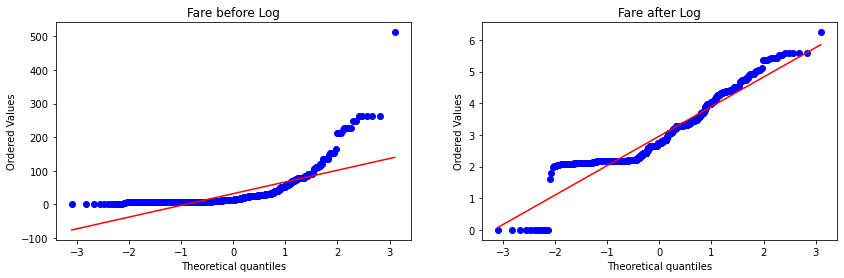

In [18]:

### Fare disribution has improved as compared to previous .

plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'],dist="norm",plot=plt)
plt.title("Fare before Log")

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'],dist="norm",plot=plt)
plt.title("Fare after Log")

### Column Transformer 

- We have used column transformer to apply transformation only to Fare features.
- Bec the distribution is getting improved after applying transformation


In [19]:

# Now we have to apply tranformation only to single feature - fare 
# thus we will go with Column transformer.

trf2= ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],
                       remainder='passthrough')

X_train_transform=trf2.fit_transform(X_train)
X_test_transform=trf2.transform(X_test)

clf1=LogisticRegression()
clf2=DecisionTreeClassifier()

clf1.fit(X_train_transform,y_train)
clf2.fit(X_train_transform,y_train)

y_pred_1=clf1.predict(X_test_transform)
y_pred_2=clf2.predict(X_test_transform)

print("Accuracy at LR",accuracy_score(y_test,y_pred_1))
print("Accuracy at DT",accuracy_score(y_test,y_pred_2))


Accuracy at LR 0.6368715083798883
Accuracy at DT 0.6201117318435754


In [20]:
X_tranformed2=trf2.fit_transform(X)

clf1=LogisticRegression()
clf2=DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf1,X_tranformed2,Y,scoring="accuracy",cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_tranformed2,Y,scoring="accuracy",cv=10)))

LR 0.6712609238451936
DT 0.6543445692883895


### 2. Power Transformer 

In [24]:
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
import scipy.stats as stats

In [23]:
df=pd.read_csv("D:\\Sandesh\\100-days-of-machine-learning\\day31-power-transformer\\concrete_data.csv")
df.head()               

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [25]:
df.shape

(1030, 9)

In [26]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [27]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [33]:
X=df.drop(columns=['Strength'],axis=1)
y=df.iloc[:,-1]
y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: Strength, Length: 1030, dtype: float64

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.2,random_state=60)

In [48]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)
r2_score(y_test,y_pred)

0.6229714320632687

In [49]:
#To do cross - checl of the accuracy
np.mean(cross_val_score(lr,X,y,scoring='r2'))


0.4609940491662866

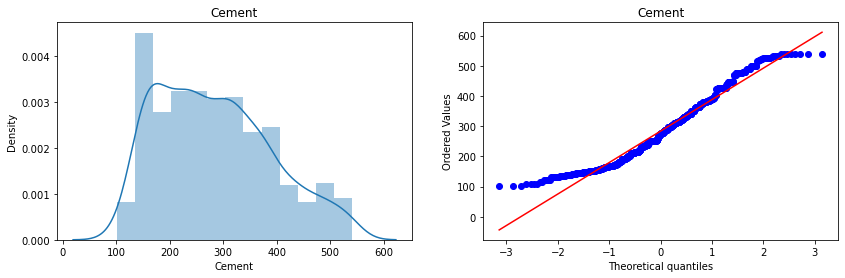

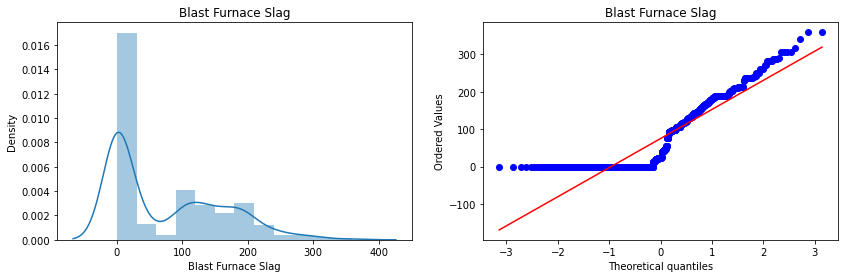

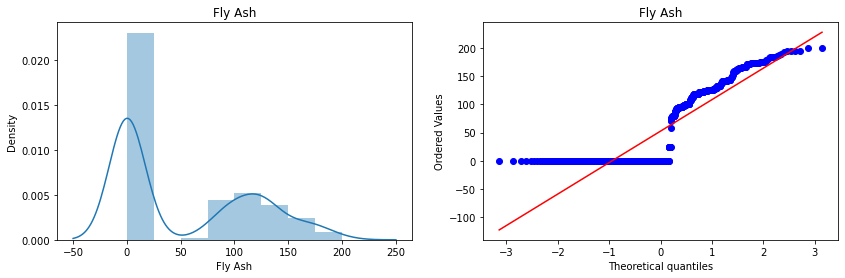

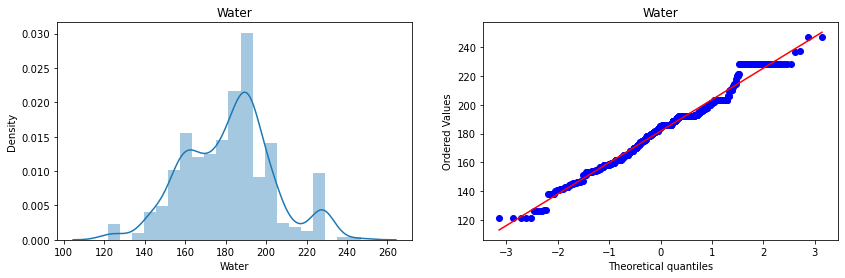

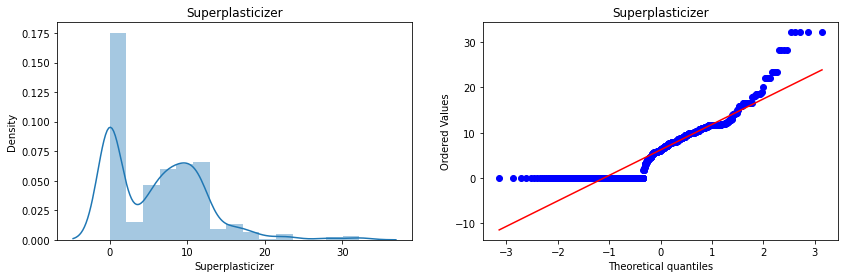

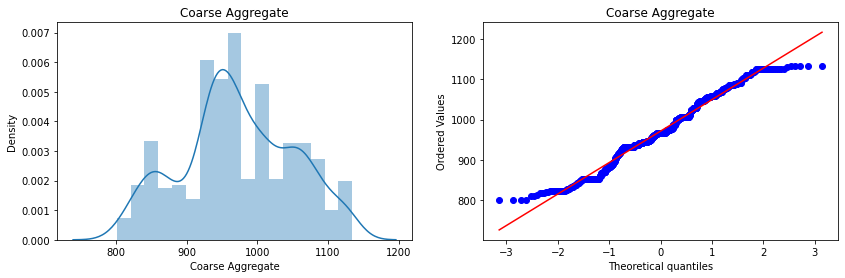

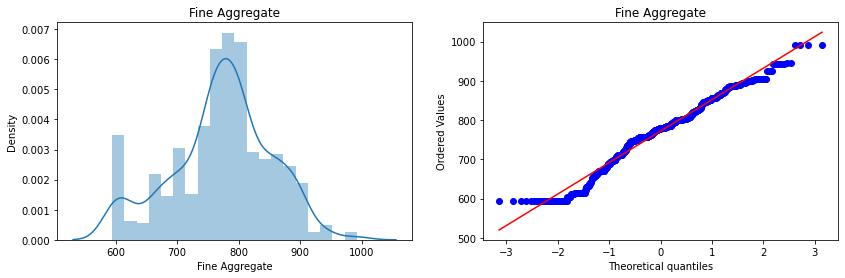

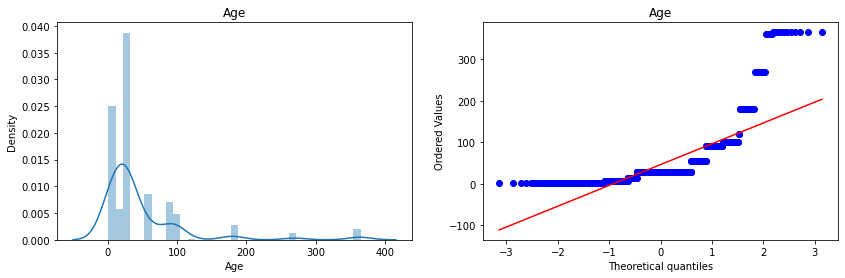

In [52]:
for cols in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    # Distribution plot
    sns.distplot(X_train[cols])
    plt.title(cols)
    
    plt.subplot(122)
    # QQ plot
    stats.probplot(X_train[cols],dist="norm",plot=plt)
    plt.title(cols)
    plt.show()

# Age, cement , blast furnance slag distribution is not normal.  
    

### Box-Cox Transform

In [63]:

pt=PowerTransformer(method='box-cox')

# 0.0001 is added bec box-cox does not want any values to be zero.
# It cannot handle values = 0 
X_train_transformed=pt.fit_transform(X_train+0.000001)
X_test_transformed=pt.transform(X_test+0.000001)

pd.DataFrame({cols:X_train.columns,'box-cox':pt.lambdas_})

,Age,box-cox
0,Cement,0.198898
1,Blast Furnace Slag,0.035884
2,Fly Ash,-0.041379
3,Water,0.775841
4,Superplasticizer,0.098733
5,Coarse Aggregate,0.936300
6,Fine Aggregate,1.935913
7,Age,0.040468


In [64]:
lr=LinearRegression()

lr.fit(X_train_transformed,y_train)

y_pred2=lr.predict(X_test_transformed)
r2_score(y_test,y_pred2)

0.8196371629962111

In [65]:

# Cross check the accuracy values by applying cross_val_score

np.mean(cross_val_score(lr,X_train_transformed,y_train,scoring='r2'))

0.792172607975279

In [68]:

# Perform cross_val_score on X and y.

X_transformed=pt.fit_transform(X+0.0000001)
np.mean(cross_val_score(lr,X_transformed,y,scoring='r2'))

0.6658537942219862

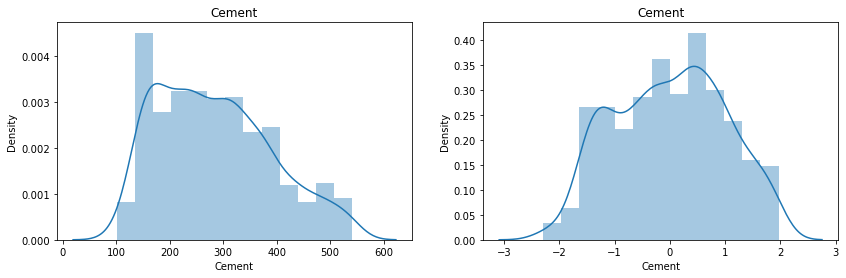

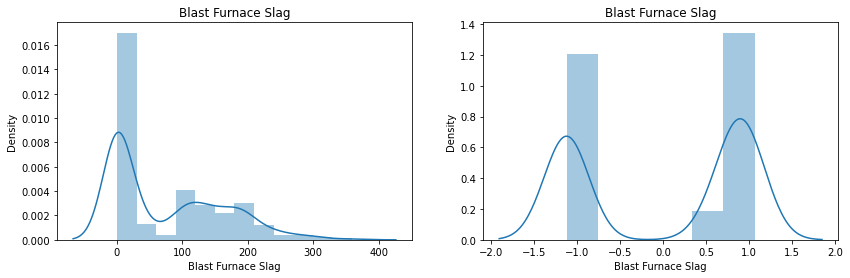

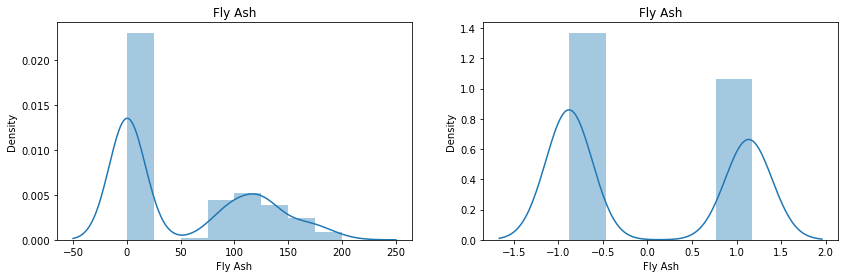

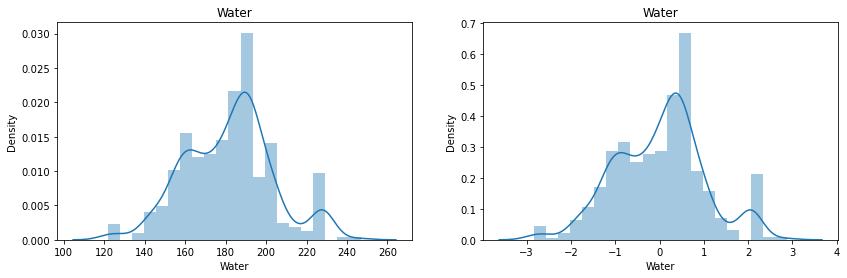

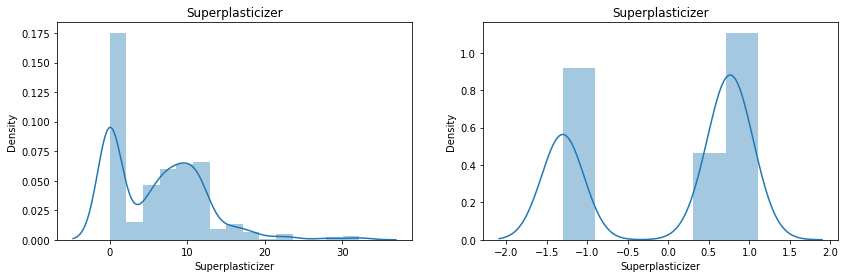

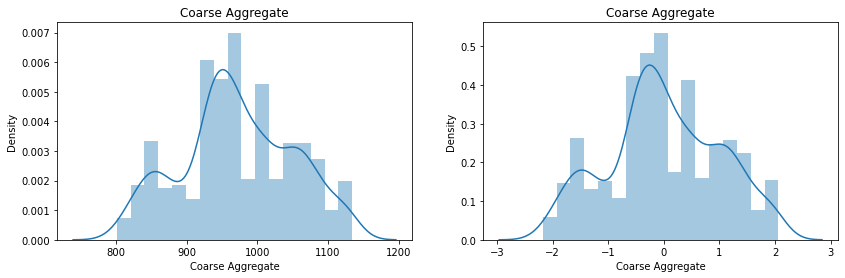

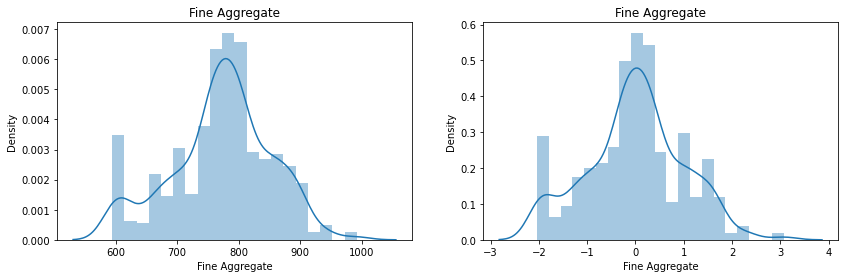

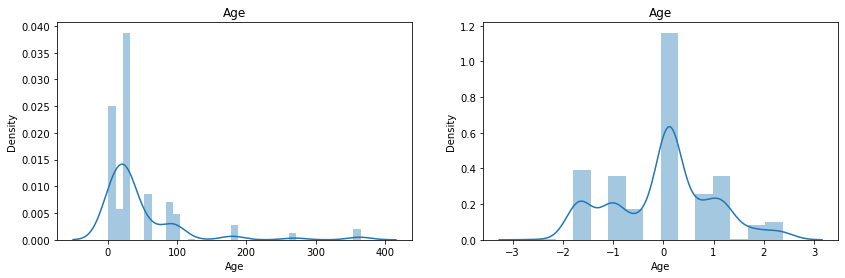

In [70]:

# Distribution comparison before and after applying box-cox transformation. 

X_train_transformed= pd.DataFrame(X_train_transformed,columns=X_train.columns)

for cols in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[cols])
    plt.title(cols)

    plt.subplot(122)
    sns.distplot(X_train_transformed[cols])
    plt.title(cols)
    
    plt.show()
    
    
 # Age distribution has been improved.   
    

### Yeo-Johnson Transform 

In [77]:
pt1=PowerTransformer()

X_train_transformed2=pt1.fit_transform(X_train)
X_test_transformed2=pt1.transform(X_test)

lr=LinearRegression()
lr.fit(X_train_transformed2,y_train)
y_pred2=lr.predict(X_test_transformed2)

print("R2-score",r2_score(y_test,y_pred2))

pd.DataFrame({'cols':X_train.columns,'Yeo_johnson':pt1.lambdas_})

# Better results compare to box-cox transformation


R2-score 0.8283357828459641


,cols,Yeo_johnson
0,Cement,0.196309
1,Blast Furnace Slag,0.047716
2,Fly Ash,-0.170342
3,Water,0.774527
4,Superplasticizer,0.247896
5,Coarse Aggregate,0.936332
6,Fine Aggregate,1.937202
7,Age,-0.006107


In [81]:

# applying cross_val_score on X and y values

X_tranform_org=pt.fit_transform(X+0.000001)
np.mean(cross_val_score(lr,X_tranform_org,y,scoring='r2'))


0.6662950327869241

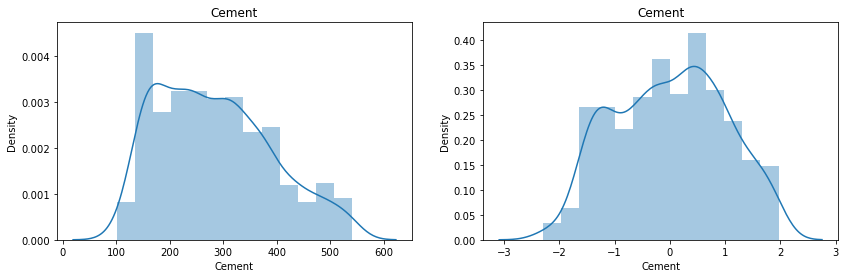

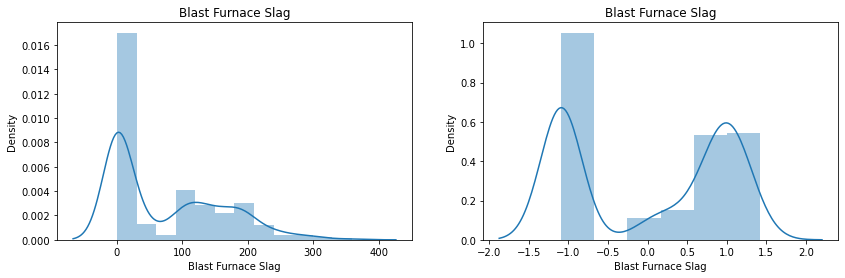

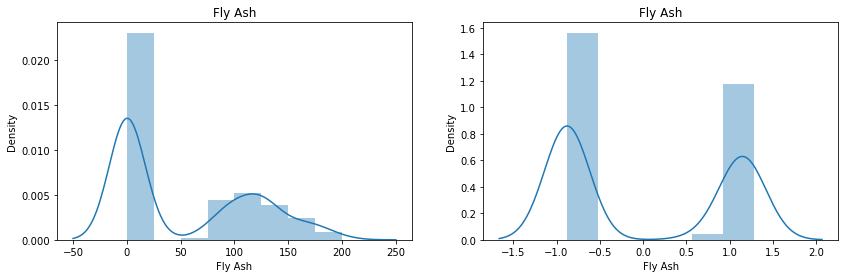

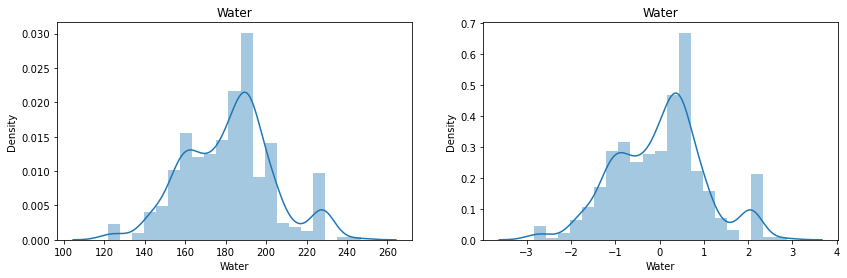

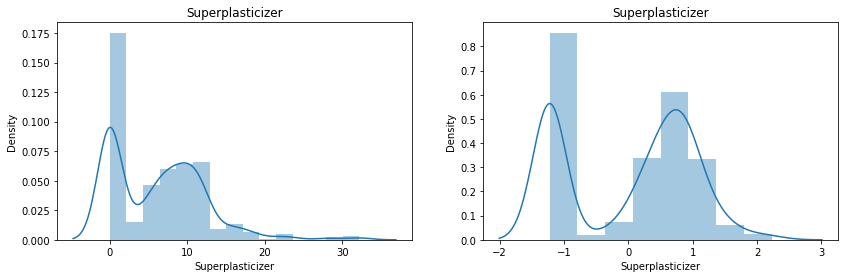

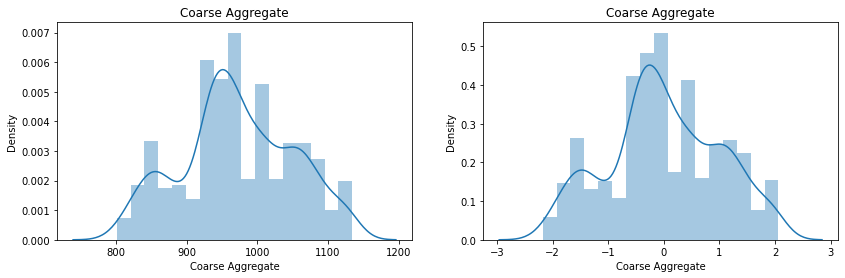

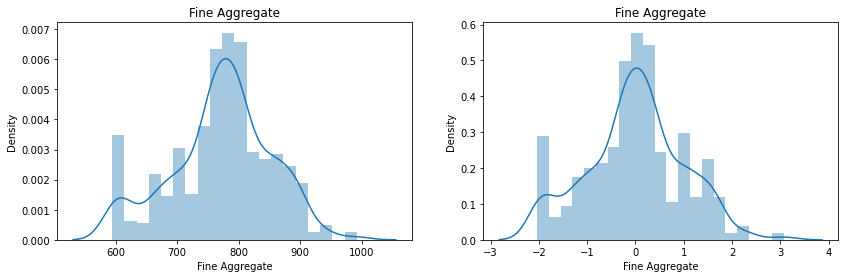

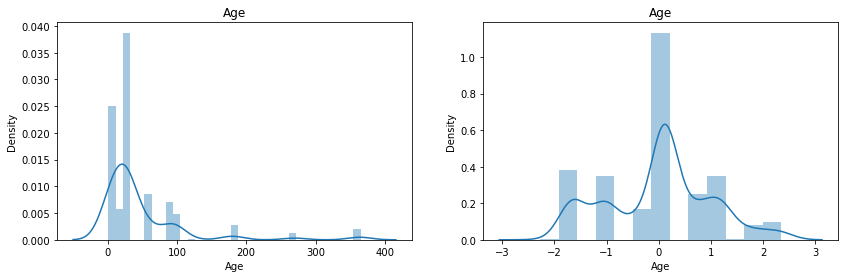

In [84]:
# Distribution comparison before and after applying box-cox transformation. 

X_train_transformed_2= pd.DataFrame(X_train_transformed2,columns=X_train.columns)

for cols in X_train_transformed_2.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[cols])
    plt.title(cols)

    plt.subplot(122)
    sns.distplot(X_train_transformed_2[cols])
    plt.title(cols)
    plt.show()

In [87]:
pd.DataFrame({'Features':X_train.columns,
              'Box_Cox':pt.lambdas_,
              'Johnson':pt1.lambdas_})

,Features,Box_Cox,Johnson
0,Cement,0.172271,0.196309
1,Blast Furnace Slag,0.025273,0.047716
2,Fly Ash,-0.032412,-0.170342
3,Water,0.809568,0.774527
4,Superplasticizer,0.099711,0.247896
5,Coarse Aggregate,1.129168,0.936332
6,Fine Aggregate,1.829625,1.937202
7,Age,0.048975,-0.006107


### THE END 